In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [3]:
df = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


### Drop some columns

In [4]:
df.drop(columns=["Cumulative_cases","Cumulative_deaths"], inplace=True)

### Change column name

In [5]:
df.rename(columns={"WHO_region":"WHO"}, inplace=True)

### Check duplicates

In [6]:
df.duplicated(subset=df.columns[:4]).sum()

0

### Filtering data

In [7]:
df = df[ (df.Date_reported>='2021-01-01')&(df.New_cases>=0)&(df.New_deaths)]
df.shape

(26320, 6)

### Get statistical metrics

In [8]:
df.describe()

,New_cases,New_deaths
count,26320.000000,26320.000000
mean,5871.725266,73.534119
std,25042.368543,258.562983
min,0.000000,-31.000000
25%,161.000000,3.000000
50%,723.000000,9.000000
75%,2800.000000,37.000000
max,909521.000000,4529.000000


### Show data only for particular country

In [9]:
country = "Poland"
df_PL = df.query(f" Country=='{country}' ")
df_PL.sample(n=10, random_state=0)

,Date_reported,Country_code,Country,WHO,New_cases,New_deaths
128491,2021-02-08,PL,Poland,EURO,2431,45
128543,2021-04-01,PL,Poland,EURO,35251,621
128522,2021-03-11,PL,Poland,EURO,21045,375
128530,2021-03-19,PL,Poland,EURO,25998,419
128654,2021-07-21,PL,Poland,EURO,124,3
128622,2021-06-19,PL,Poland,EURO,168,41
128465,2021-01-13,PL,Poland,EURO,9053,481
128697,2021-09-02,PL,Poland,EURO,390,7
128480,2021-01-28,PL,Poland,EURO,7156,389
128756,2021-10-31,PL,Poland,EURO,7145,9


### Sort data

In [10]:
df_PL.sort_values(["Date_reported","New_cases","New_deaths"], ascending=[True,False,True], inplace=True)
df_PL

,Date_reported,Country_code,Country,WHO,New_cases,New_deaths
128455,2021-01-03,PL,Poland,EURO,5739,61
128457,2021-01-05,PL,Poland,EURO,7624,341
128458,2021-01-06,PL,Poland,EURO,14151,553
128462,2021-01-10,PL,Poland,EURO,9410,177
128463,2021-01-11,PL,Poland,EURO,4622,75
...,...,...,...,...,...,...
128847,2022-01-30,PL,Poland,EURO,48287,23
128848,2022-01-31,PL,Poland,EURO,33477,33
128850,2022-02-02,PL,Poland,EURO,56051,319
128851,2022-02-03,PL,Poland,EURO,54475,307


### Show only subset of columns

In [11]:
df_PL[ ["Date_reported","New_cases","New_deaths"] ]

,Date_reported,New_cases,New_deaths
128455,2021-01-03,5739,61
128457,2021-01-05,7624,341
128458,2021-01-06,14151,553
128462,2021-01-10,9410,177
128463,2021-01-11,4622,75
...,...,...,...
128847,2022-01-30,48287,23
128848,2022-01-31,33477,33
128850,2022-02-02,56051,319
128851,2022-02-03,54475,307


### Convert columns data type

In [12]:
df_PL.Date_reported = pd.to_datetime(df_PL.Date_reported, format="%Y-%m-%d")
df_PL.New_cases = df_PL.New_cases.astype('uint32')
df_PL.New_deaths = df_PL.New_deaths.astype('uint32')

### Set dataframe custom index based on datetime columns

In [13]:
df_PL.set_index("Date_reported", inplace=True)
df_PL

,Country_code,Country,WHO,New_cases,New_deaths
Date_reported,,,,,
2021-01-03,PL,Poland,EURO,5739,61
2021-01-05,PL,Poland,EURO,7624,341
2021-01-06,PL,Poland,EURO,14151,553
2021-01-10,PL,Poland,EURO,9410,177
2021-01-11,PL,Poland,EURO,4622,75
...,...,...,...,...,...
2022-01-30,PL,Poland,EURO,48287,23
2022-01-31,PL,Poland,EURO,33477,33
2022-02-02,PL,Poland,EURO,56051,319


### Show simple chart

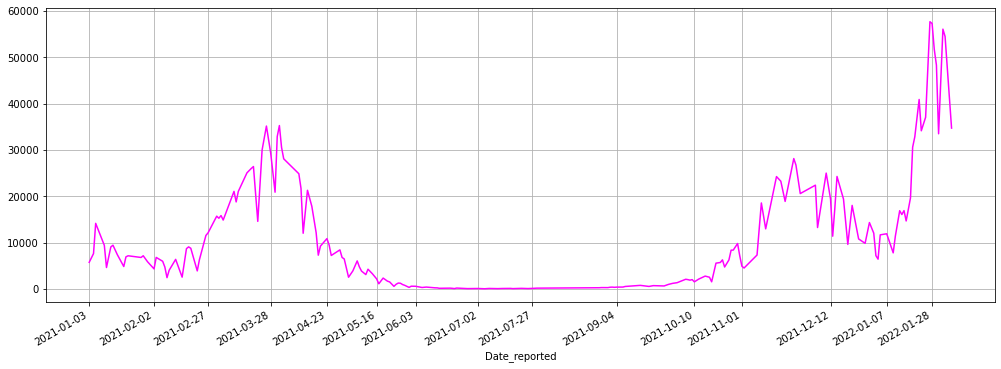

In [14]:
df_PL["New_cases"].plot(figsize=(17,6), grid=True, color='magenta')
plt.xticks(df_PL.index[::14])
plt.show()

### Chart with seaborn library

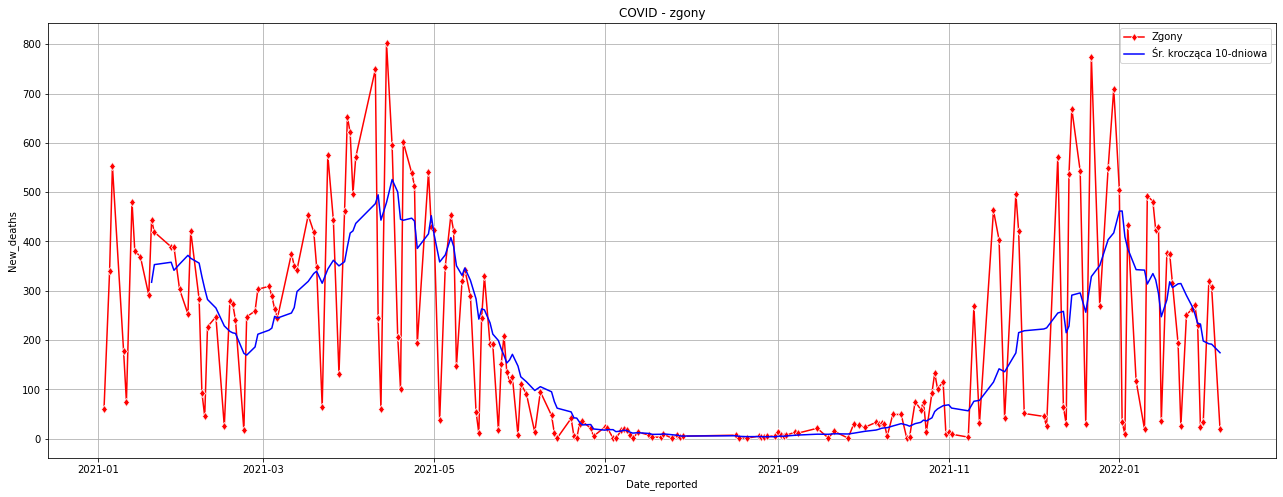

In [15]:
plt.figure(figsize=(22,8))
fig = sns.lineplot(data=df_PL, x="Date_reported", y="New_deaths", color="red", marker="d" )
df_PL["d-mavg"] = df_PL.New_deaths.rolling(10).mean()
sns.lineplot(data=df_PL, x="Date_reported", y="d-mavg", color="blue",  ax=fig )

fig.set_title("COVID - zgony")
plt.legend(['Zgony','Śr. krocząca 10-dniowa'])
plt.grid()

### Chart with additional y-axis

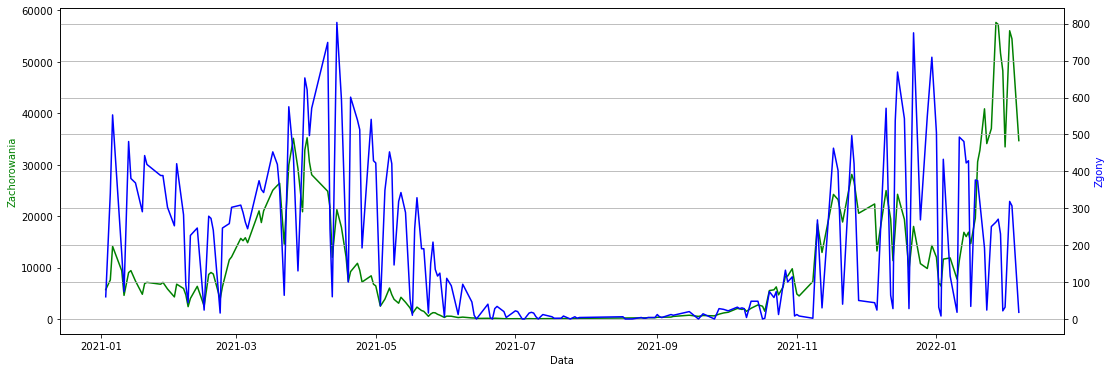

In [16]:
fig, ax1 = plt.subplots(figsize=(18,6))

ax2 = ax1.twinx()
ax1.plot(df_PL.index, df_PL.New_cases, 'g-')
ax2.plot(df_PL.index, df_PL.New_deaths, 'b-')

ax1.set_xlabel('Data')
ax1.set_ylabel('Zachorowania', color='g')
ax2.set_ylabel('Zgony', color='b')
plt.grid()
plt.show()

### Merge data

In [17]:
df_cc = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")
df_cc.sample(n=3)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
189,Saint Martin (French part),MF,MAF,663,ISO 3166-2:MF,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
135,Maldives,MV,MDV,462,ISO 3166-2:MV,Asia,Southern Asia,NaN,142.0,34.0,NaN
124,Lebanon,LB,LBN,422,ISO 3166-2:LB,Asia,Western Asia,NaN,142.0,145.0,NaN


In [18]:
df = pd.merge(df, df_cc[["alpha-2","region"]] , left_on="Country_code", right_on="alpha-2", how="left", indicator=True)
df

,Date_reported,Country_code,Country,WHO,New_cases,New_deaths,alpha-2,region,_merge
0,2021-01-04,AF,Afghanistan,EMRO,200,9,AF,Asia,both
1,2021-01-05,AF,Afghanistan,EMRO,102,7,AF,Asia,both
2,2021-01-06,AF,Afghanistan,EMRO,94,7,AF,Asia,both
3,2021-01-07,AF,Afghanistan,EMRO,102,9,AF,Asia,both
4,2021-01-09,AF,Afghanistan,EMRO,68,7,AF,Asia,both
...,...,...,...,...,...,...,...,...,...
26315,2022-01-28,ZW,Zimbabwe,AFRO,153,3,ZW,Africa,both
26316,2022-01-29,ZW,Zimbabwe,AFRO,237,9,ZW,Africa,both
26317,2022-02-01,ZW,Zimbabwe,AFRO,206,1,ZW,Africa,both
26318,2022-02-04,ZW,Zimbabwe,AFRO,158,5,ZW,Africa,both


### Looking for unmerged data

In [19]:
df[df._merge=='left_only'].Country_code.unique().tolist()

['XA', 'XK', 'XB']

### Show unmerged data

In [20]:
df[ df.Country_code.isin(df[df._merge=='left_only'].Country_code.unique())  ].Country.unique()

array(['Bonaire', 'Kosovo[1]', 'Sint Eustatius'], dtype=object)

### Update unmerged data

In [21]:
def update_cont(country, region):
    if country=='Bonaire': return "Americas"
    if country=='Kosovo[1]': return "Europe"
    if country=='Sint Eustatius': return "Americas"
    return region

df['region'] = df.apply(lambda row: update_cont(row['Country'], row['region']), axis=1)

### Grouping

In [22]:
df_tmp = df.reset_index().groupby(["Date_reported","region"])[ ["New_cases","New_deaths"] ].sum().reset_index()
df_tmp

,Date_reported,region,New_cases,New_deaths
0,2021-01-01,Africa,7835,181
1,2021-01-01,Americas,31600,625
2,2021-01-01,Asia,30909,588
3,2021-01-01,Europe,94855,1958
4,2021-01-01,Oceania,10,1
...,...,...,...,...
1861,2022-02-07,Africa,10725,158
1862,2022-02-07,Americas,118581,709
1863,2022-02-07,Asia,395867,1461
1864,2022-02-07,Europe,702746,1607


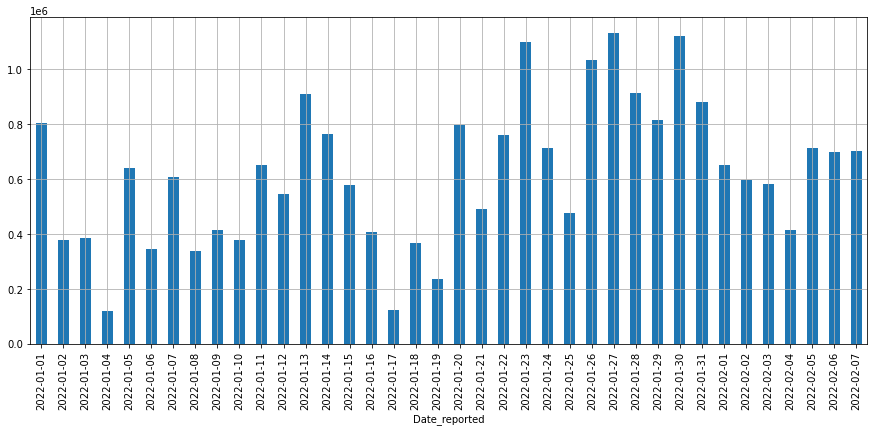

In [23]:
df_tmp.set_index('Date_reported')["2022":].query("region=='Europe'").\
            New_cases.plot(kind='bar', figsize=(15,6), grid=True);

### Calc 14-days average value for new cases

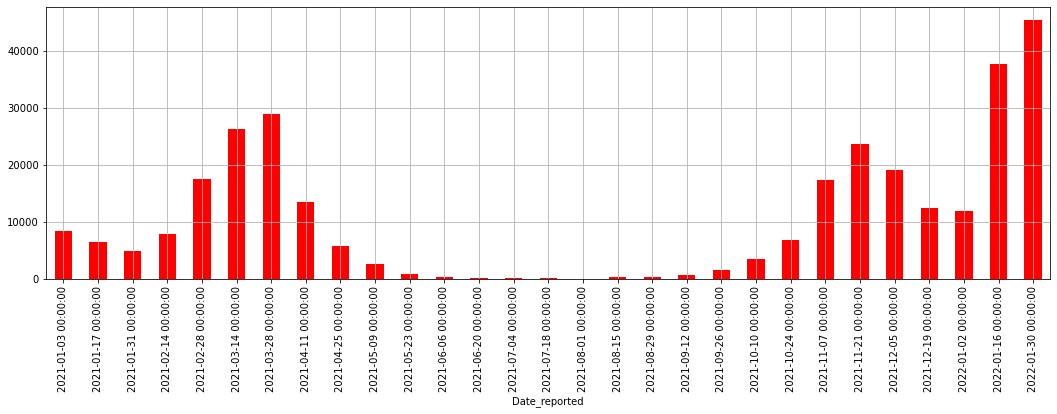

In [24]:
df_tmp = df.copy()
df_tmp['Date_reported'] = pd.to_datetime(df_tmp['Date_reported'], format = '%Y-%m-%d', errors = 'coerce')
df_tmp.set_index('Date_reported', inplace=True)
serie_poland = df_tmp[df_tmp['Country'] == 'Poland'].New_cases.resample('14D').mean()
serie_poland.plot(figsize=(18,5), kind='bar', color='red', grid=True)
plt.show()

### Pivot data

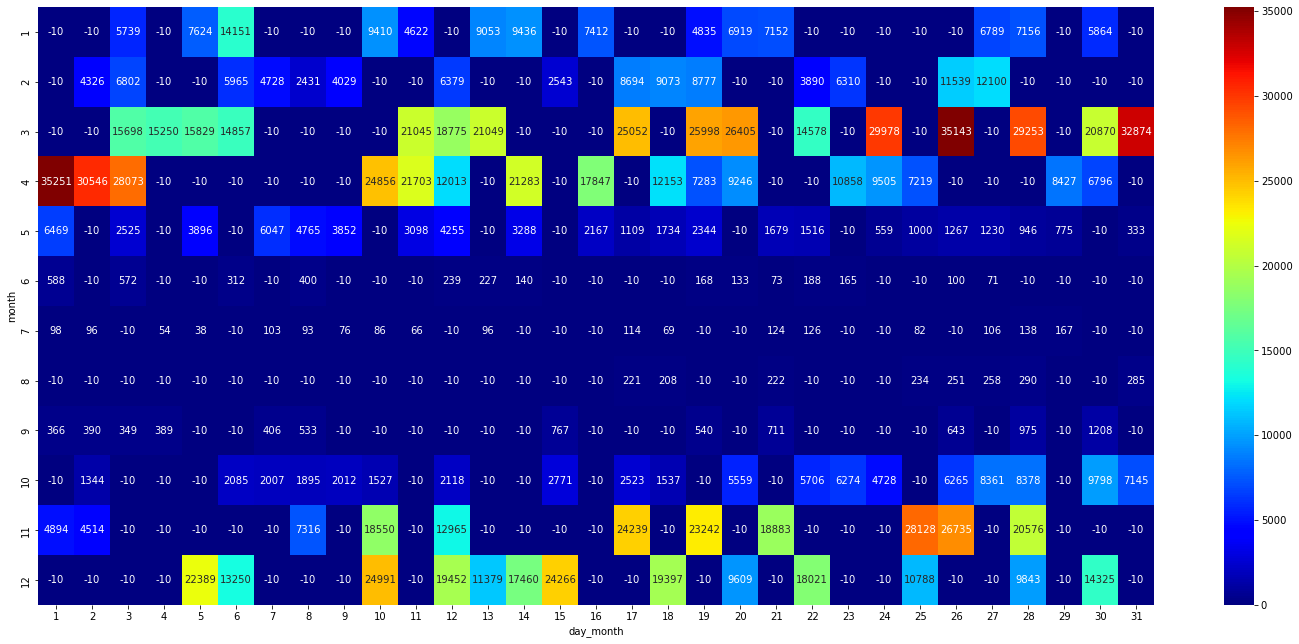

In [25]:
df_tmp = df[(df.Date_reported.str.startswith("2021"))&(df.Country_code=='PL')]
df_tmp['Date_reported'] = pd.to_datetime(df_tmp['Date_reported'], format = '%Y-%m-%d', errors = 'coerce')
df_tmp["month"] = df_tmp.Date_reported.dt.month
df_tmp["day_month"] = df_tmp.Date_reported.dt.day

df_heat = pd.pivot_table(data=df_tmp, index='month', columns="day_month", values='New_cases')
df_heat.fillna(-10, inplace=True)
for c in df_heat: df_heat[c] = df_heat[c].astype('int')
plt.figure(figsize=(25,11))
sns.heatmap(data=df_heat, annot=True, fmt='d', cmap='jet');

### Top 9 countries with highest value of cases in Euro WHO region

In [26]:
countries = list(df.query("Date_reported>='2021-01-01' and WHO=='EURO' ").\
    groupby("Country")["New_cases"].sum().sort_values(ascending=False).head(9).index)
countries

['France',
 'The United Kingdom',
 'Russian Federation',
 'Turkey',
 'Italy',
 'Spain',
 'Germany',
 'Poland',
 'Netherlands']

### Multi charts

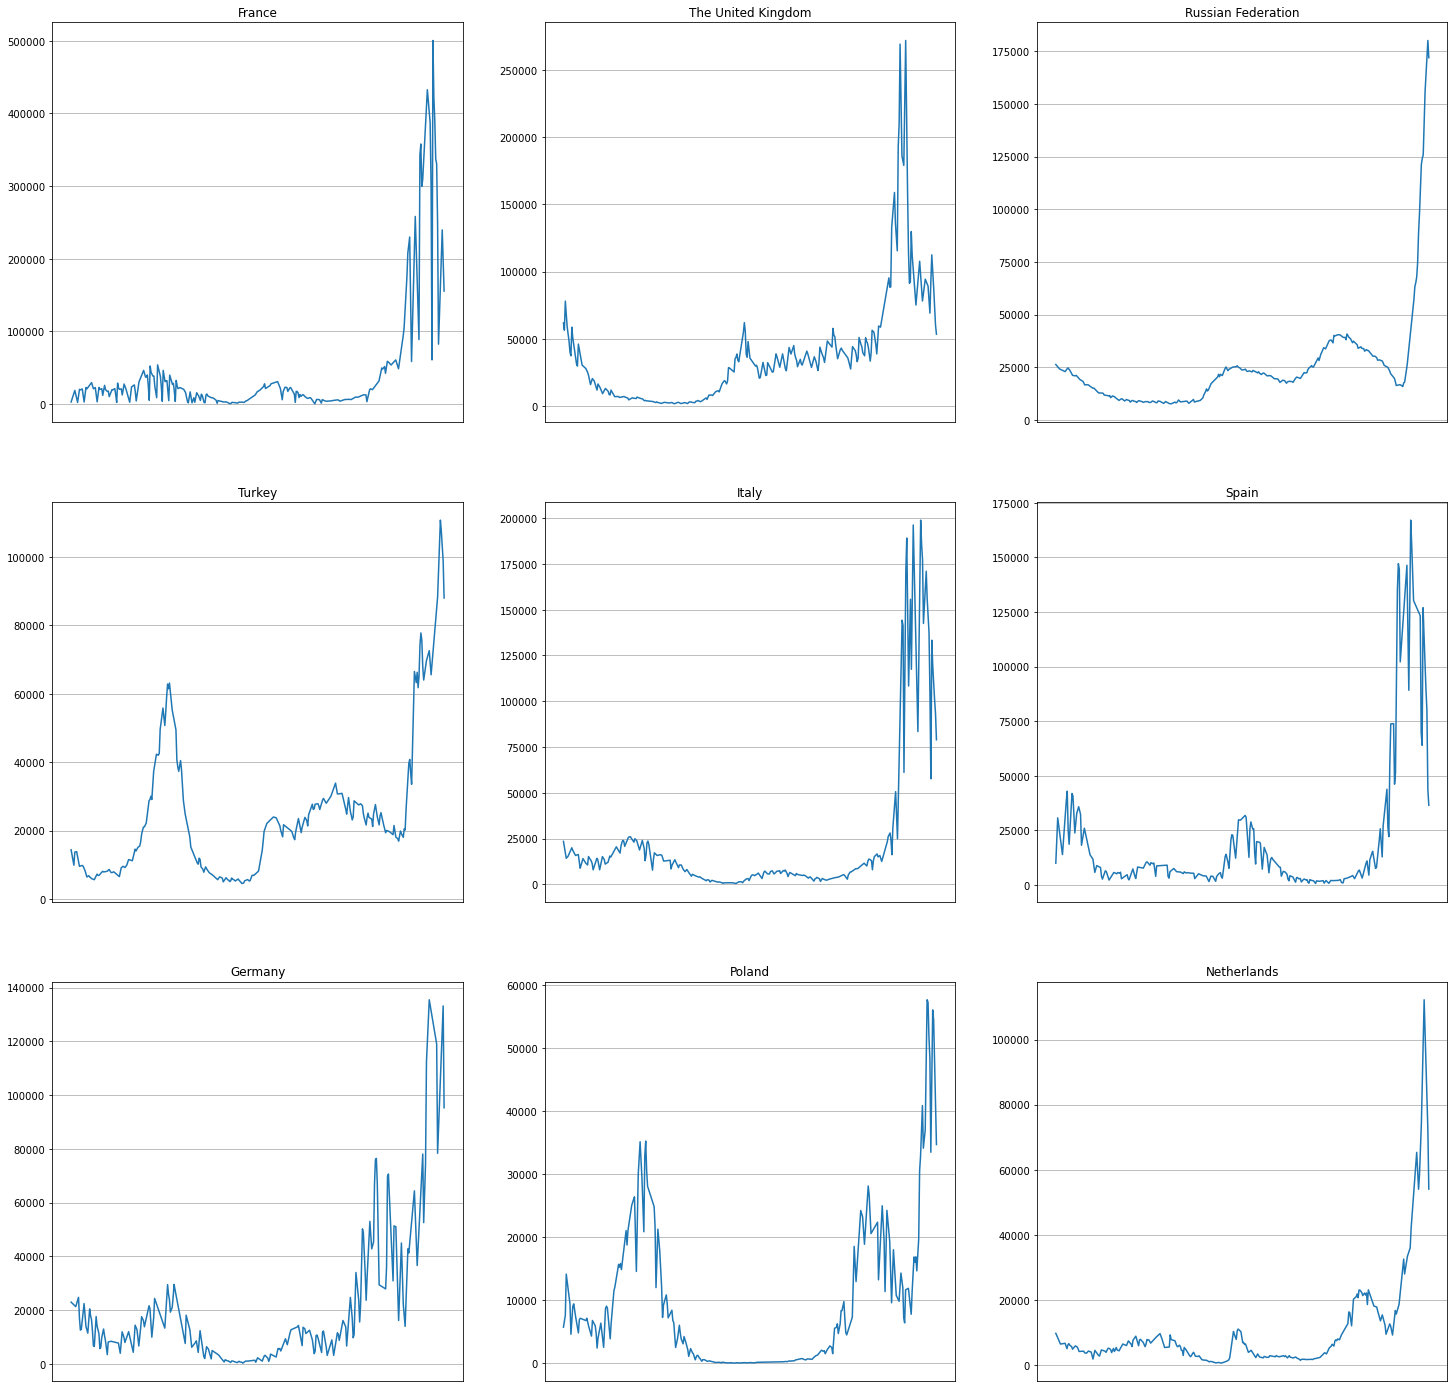

In [27]:
plt.subplots(3, 3, figsize=(25,25))
for index, c in enumerate(countries,1):
    df_tmp = df.query(f" Date_reported>='2021-01-01' and Country=='{c}' ")
    plt.subplot(3, 3, index)
    plt.plot(pd.to_datetime(df_tmp.Date_reported), df_tmp.New_cases)
    plt.title(c)
    plt.grid()
    plt.xticks([])

### Shifting data

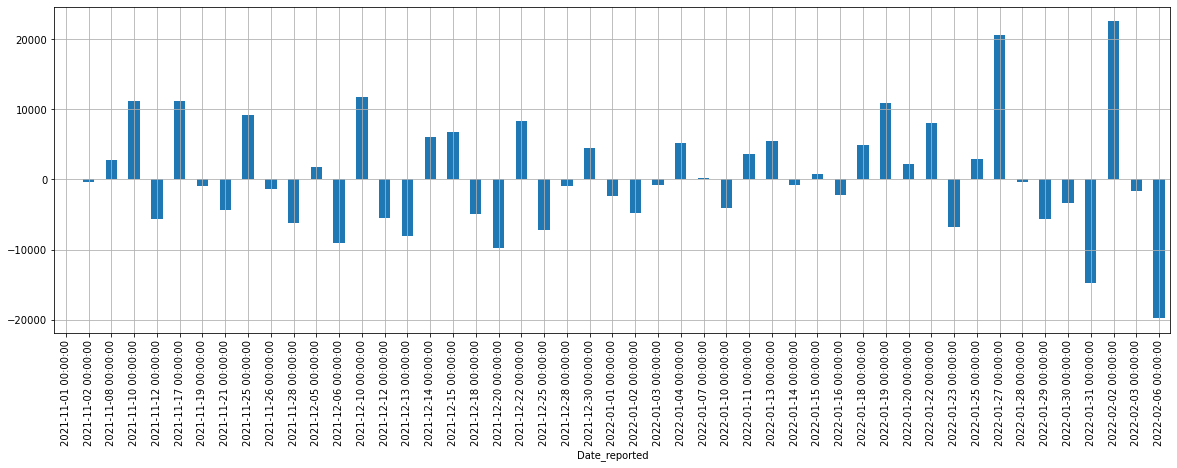

In [28]:
df_tmp = df_PL["2021-11":]
df_tmp["change_dtd"] = df_tmp.New_cases - df_tmp.New_cases.shift(1)
df_tmp["change_dtd"].plot(kind='bar', figsize=(20,6), grid=True)
plt.show()

### Correlation between cases and deaths

In [29]:
df_PL[df_PL.columns[-3:-1]].corr()

,New_cases,New_deaths
New_cases,1.000000,0.476706
New_deaths,0.476706,1.000000


### Store data to XLSX file

In [30]:
df_PL.to_excel("covid-pl.xlsx")